# CVPR Project - Part III: Blurry Template Matching with SIFT 

## Multi Model Multi Template Fitting

Iva Ilcheva<br>
Reinard Lazuardi Kuwandy

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import spatial
%matplotlib inline

IMG_TARGET = 'img/target-chocolates.jpg'
IMG_TEMPLATE = [
    'img/au-lait.jpg',
    'img/choco-noisettes.jpg', 
    'img/cremant.jpg',
    'img/gianduja.png',
    'img/noir-amarante.jpg',
    'img/noir-coco.jpg',
    'img/noir-gingembre.jpg', 
    'img/noir-orange.jpg'
]

### Helper Functions

In [28]:
from utils import *

## Preparation

In [29]:
def apply_gaussian_blur(img, filter_matrix):
    return cv.GaussianBlur(img, filter_matrix, 0)

In [117]:
def apply_averaging_blur(img, filter_matrix):
    return cv.blur(img,filter_matrix)

## Implementation

## GAUSSIAN BLUR ##

In [106]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [107]:
img_template = apply_gaussian_blur(img_template,(15,15))

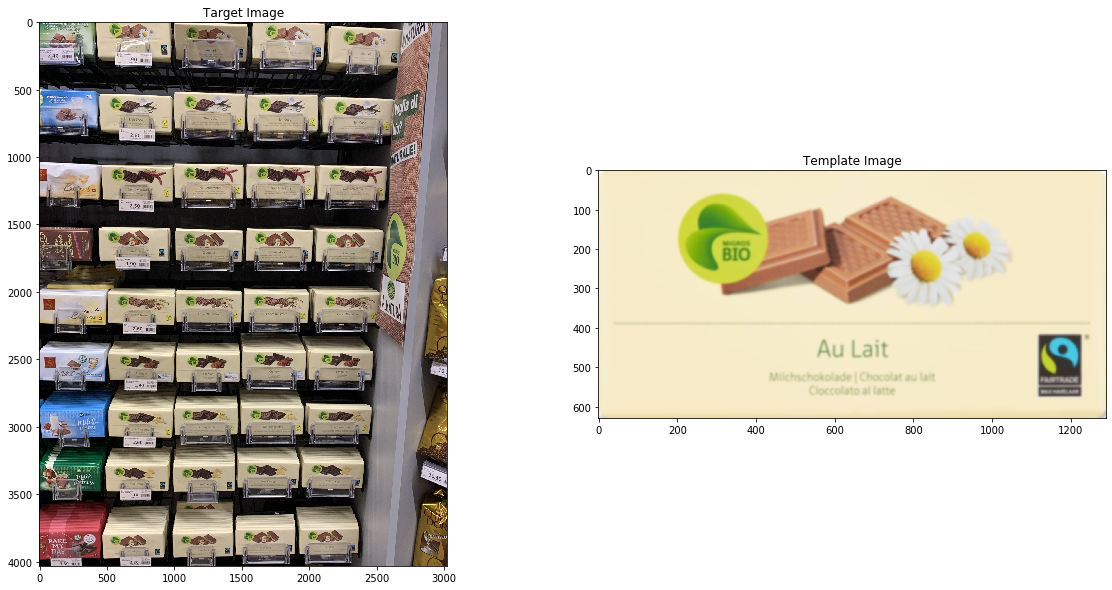

In [108]:
plot_images(img_target, img_template)

In [109]:
keypoints_target, descriptors_target, keypoints_template, descriptors_template = sift_keypoints_and_descriptors(img_target, img_template)

In [110]:
plot_best_matches, best_matches = get_best_matches(descriptors_target, descriptors_template, ratio=0.45)

In [ ]:
draw_closest_matches(img_target, img_template, keypoints_target, keypoints_template, plot_best_matches)

In [112]:
correspondences = get_correspondences(best_matches, keypoints_target, keypoints_template)

In [113]:
len(correspondences)

314

In [114]:
models = sequential_msac(correspondences, 1, 4,99,5000, 0.8)

295
280
262


In [115]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

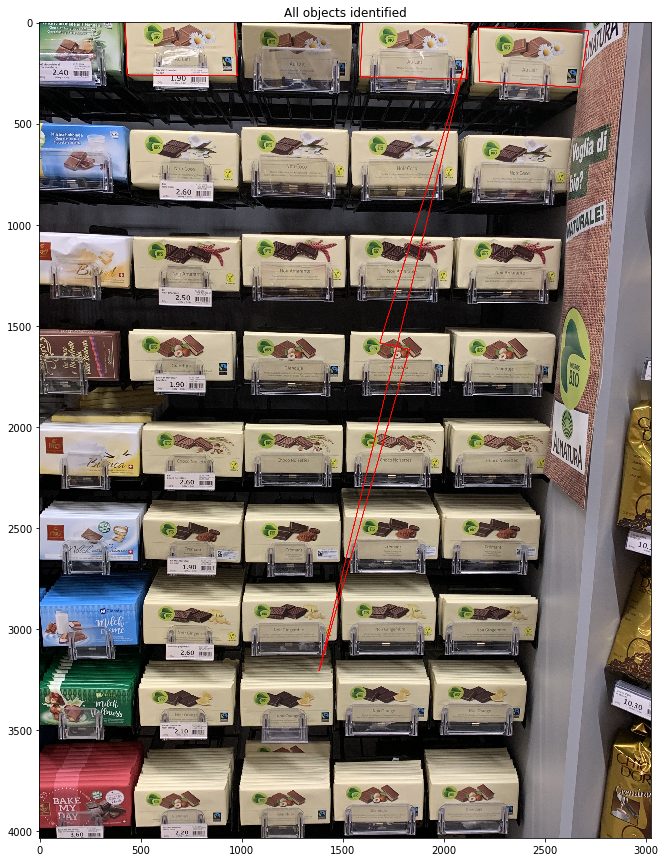

In [116]:
draw_bounding_boxes(img_target, img_template, models, 1, isPostJLinkage=False, color=(3, 3, 252))

In [71]:
PS = get_preference_sets(correspondences, models)

In [80]:
del models[-1]

In [79]:
models

[[array([[ 3.47497881e-01,  7.35106415e-03,  4.54461729e+02],
         [-3.19123329e-03,  4.20519119e-01, -1.30548454e+01],
         [-5.64894485e-05, -4.09794632e-06,  1.00000000e+00]]),
  [[561.4415893554688,
    252.4691619873047,
    670.8101806640625,
    93.56241607666016],
   [591.4619140625, 252.75686645507812, 682.6757202148438, 94.23756408691406],
   [586.3613891601562,
    469.4540100097656,
    683.7905883789062,
    188.93450927734375],
   [608.6610717773438, 461.279296875, 693.1759033203125, 186.32037353515625],
   [617.61083984375, 468.13275146484375, 697.065673828125, 189.3072509765625],
   [649.0639038085938,
    470.56280517578125,
    710.8548583984375,
    190.950927734375],
   [675.3717041015625,
    462.1695861816406,
    721.1336669921875,
    187.13714599609375],
   [683.5488891601562, 464.76025390625, 724.674072265625, 187.9570770263672],
   [684.4578857421875,
    451.5616760253906,
    724.6890258789062,
    182.00108337402344],
   [691.68505859375, 468.79788

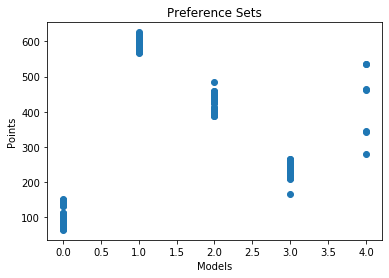

In [72]:
plot_scatter(PS)

In [83]:
cl = j_linkage(PS)

In [84]:
mod = remove_pref_set(cl)

In [88]:
mods = remove_pref_set(models)

In [85]:
mod

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  65,
  68,
  69,
  70,
  73,
  74,
  81,
  94,
  99,
  100,
  101,
  107,
  108,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  133,
  135,
  136,
  137,
  138,
  139,
  141,
  142,
  146,
  147,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203

In [75]:
mod = get_model(cl,correspondences)

In [76]:
new_mod = delete_small_model(mod, 4)

In [86]:
len(new_mod)

6

In [90]:
clusters_, clusters_size_list = define_clusters(new_mod)
clusters_size = len(clusters_)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list, clusters_)))

new_test_model = remove_far_distances_clusters(clusters_, new_mod,100)

print("Num of clusters previously: {}".format(len(new_mod)))

clusters_new, clusters_size_list_new = define_clusters(new_test_model)
clusters_new, new_test_model = merge_cluster(clusters_new, new_test_model)
clusters_new, clusters_size_list_new = define_clusters(new_test_model)

print("Num of clusters currently: {}".format(len(new_test_model)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new, clusters_new)))

Previous dunn index of the cluster : 0.0016444601381304118
Num of clusters previously: 6
Num of clusters currently: 3
Current dunn index of the cluster : 0.08836706106415441


In [94]:
img_target, img_template2 = read_images(IMG_TARGET, IMG_TEMPLATE[1])

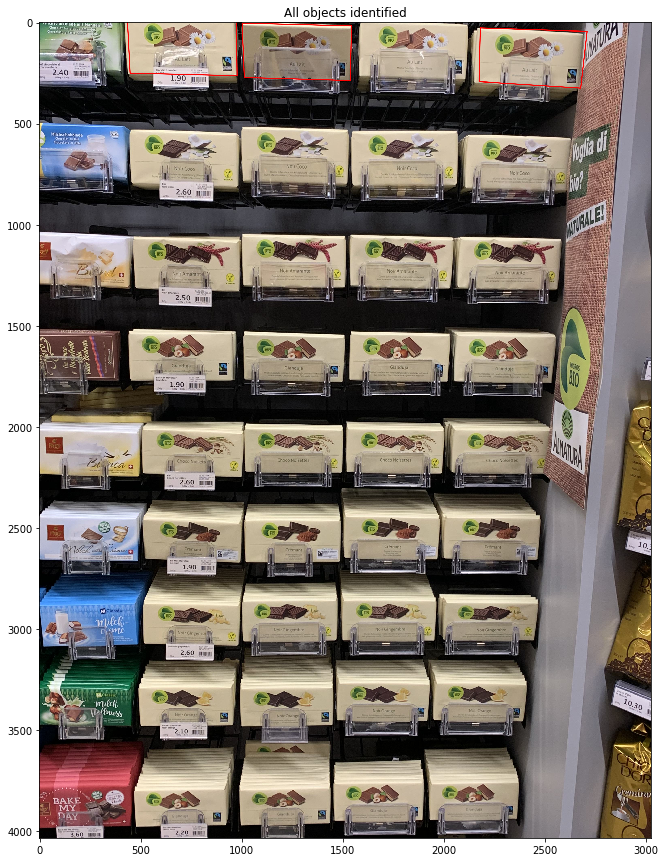

In [95]:
draw_bounding_boxes(img_target, img_template, new_test_model, 1, True, color=(3, 3, 252))

## AVERAGING

In [118]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [119]:
img_template = apply_averaging_blur(img_template,(15,15))

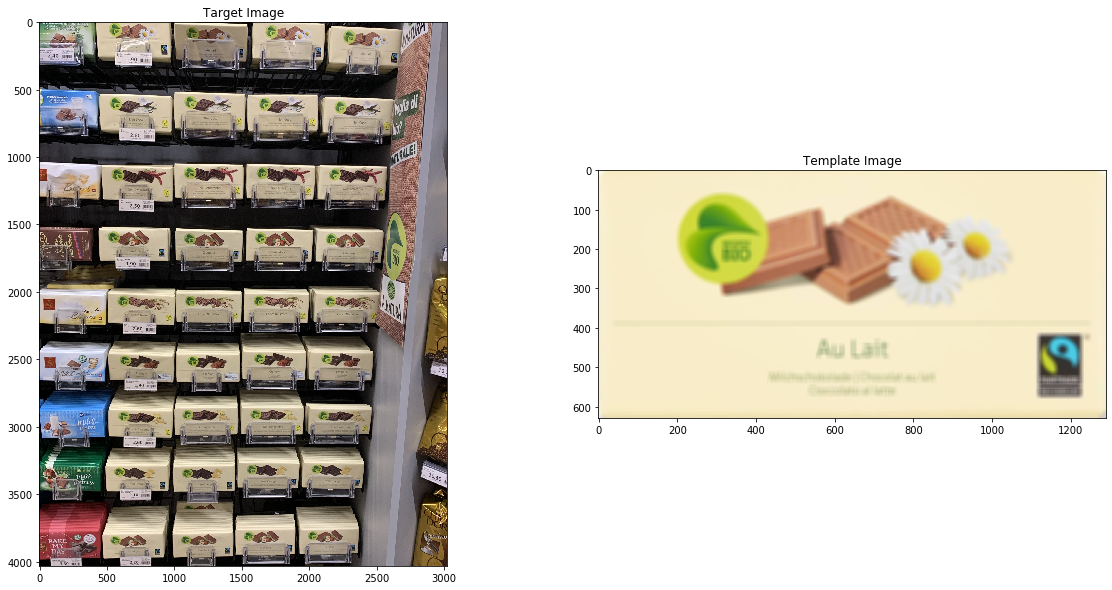

In [120]:
plot_images(img_target, img_template)

In [122]:
keypoints_target, descriptors_target, keypoints_template2, descriptors_template2 = sift_keypoints_and_descriptors(img_target, img_template)

In [123]:
plot_best_matches2, best_matches2 = get_best_matches(descriptors_target, descriptors_template2, ratio=0.45)

In [ ]:
draw_closest_matches(img_target, img_template, keypoints_target, keypoints_template2, plot_best_matches2)

In [125]:
correspondences2 = get_correspondences(best_matches2, keypoints_target, keypoints_template2)

In [126]:
len(correspondences2)

97

In [ ]:
models2 = sequential_msac(correspondences2, 1, 4,99,2500, 0.8)

In [161]:
PS2 = get_preference_sets(correspondences2, models2)

In [ ]:
plot_scatter(PS2)

In [164]:
cl2 = j_linkage(PS2)

In [165]:
mod2 = remove_pref_set(cl2)

In [167]:
mod2 = get_model(cl2,correspondences2)

In [168]:
new_mod2 = delete_small_model(mod2, 4)

In [ ]:
clusters_2, clusters_size_list2 = define_clusters(new_mod2)
clusters_size2 = len(clusters_2)
print("Previous dunn index of the cluster : {}".format(dunn_index(clusters_size_list2, clusters_2)))

new_test_model3 = remove_far_distances_clusters(clusters_2, new_mod2,100)

print("Num of clusters previously: {}".format(len(new_mod2)))

clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)
clusters_new2, new_test_model2 = merge_cluster(clusters_new2, new_test_model2)
clusters_new2, clusters_size_list_new2 = define_clusters(new_test_model2)

print("Num of clusters currently: {}".format(len(new_test_model2)))
print("Current dunn index of the cluster : {}".format(dunn_index(clusters_size_list_new2, clusters_new2)))

In [175]:
img_target, img_template = read_images(IMG_TARGET, IMG_TEMPLATE[0])

In [ ]:
draw_bounding_boxes(img_target, img_template, new_test_model2, 1, True, color=(3, 3, 252))